# Marketing Campaign Data
by Mochamad Galuh Saputra

## Task 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
#sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
path = "/content/drive/MyDrive/Bootcamp Data Science Rakamin/marketing_campaign_data.csv"
df = pd.read_csv(path)

In [ ]:
df.head(2)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0


In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0
MntFishProducts,2240.0,3.752545e+04,5.462898e+04,0.0,3000.00,12000.0,50000.00,259000.0


### Feature Engineering

In [ ]:
#Conversion Rate = Response / Jumlah Visit per Bulan
# Untuk menghindari nilai dimana 0 dibagi 0 sama dengan NULL maka
df['Convrate'] = np.where(df['NumWebVisitsMonth'] != 0, np.round(df['Response'] / df['NumWebVisitsMonth'], 2), 0)

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].sort_values(ascending = False)

2003   2014-12-06
216    2014-12-05
1034   2014-12-05
50     2014-12-05
88     2014-12-05
          ...    
1473   2012-01-09
2194   2012-01-08
724    2012-01-08
976    2012-01-08
2029   2012-01-08
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [ ]:
#Age Group
#With assumption the last year is 2014
df['Age'] = 2014 - df['Year_Birth']

age_group = []

for i in df['Age']:
    if i < 35 :
        grup = 'Young Adult'
    elif i < 65 :
        grup = 'Adult'
    else:
        grup = 'Senior Adult'
    age_group.append(grup)

df['Age_group'] = age_group

In [ ]:
#Total Kids
df['Total_kids'] = df['Kidhome'] + df['Teenhome']

#Total Amount Spent
df['Total_amount_spent'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

#Total Transcation Purchased
df['Total_transactions'] = df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']

#Is Parents
df['is_parents'] = np.where(df['Total_kids'] > 0, 1, 0)

#Total Accepted Campaign
acc_cmp = [col for col in df.columns if 'AcceptedCmp' in col]

df['Total_accepted_campaign'] = df[acc_cmp].sum(axis=1)

In [ ]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Convrate,Age,Age_group,Total_kids,Total_amount_spent,Total_transactions,is_parents,Total_accepted_campaign
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0.14,57,Adult,0,1617000,25,0,0
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0.00,60,Adult,2,27000,6,1,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0.00,49,Adult,0,776000,21,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2240 non-null   int64         
 1   Year_Birth               2240 non-null   int64         
 2   Education                2240 non-null   object        
 3   Marital_Status           2240 non-null   object        
 4   Income                   2216 non-null   float64       
 5   Kidhome                  2240 non-null   int64         
 6   Teenhome                 2240 non-null   int64         
 7   Dt_Customer              2240 non-null   datetime64[ns]
 8   Recency                  2240 non-null   int64         
 9   MntCoke                  2240 non-null   int64         
 10  MntFruits                2240 non-null   int64         
 11  MntMeatProducts          2240 non-null   int64         
 12  MntFishProducts          2240 non-

### EDA

In [ ]:
nums = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
        'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'Total_amount_spent', 'Total_transactions','Total_kids','Age']

nums1 = ['Income', 'Kidhome', 'Teenhome', 'Recency',
        'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'Total_amount_spent', 'Total_transactions','Total_kids','Age']

cats =['Education','Marital_Status',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5',
       'Complain', 'Response', 'Age_group']

analyze = ['Income', 'Recency', 'Convrate',
        'Total_amount_spent', 'Total_transactions','Age']

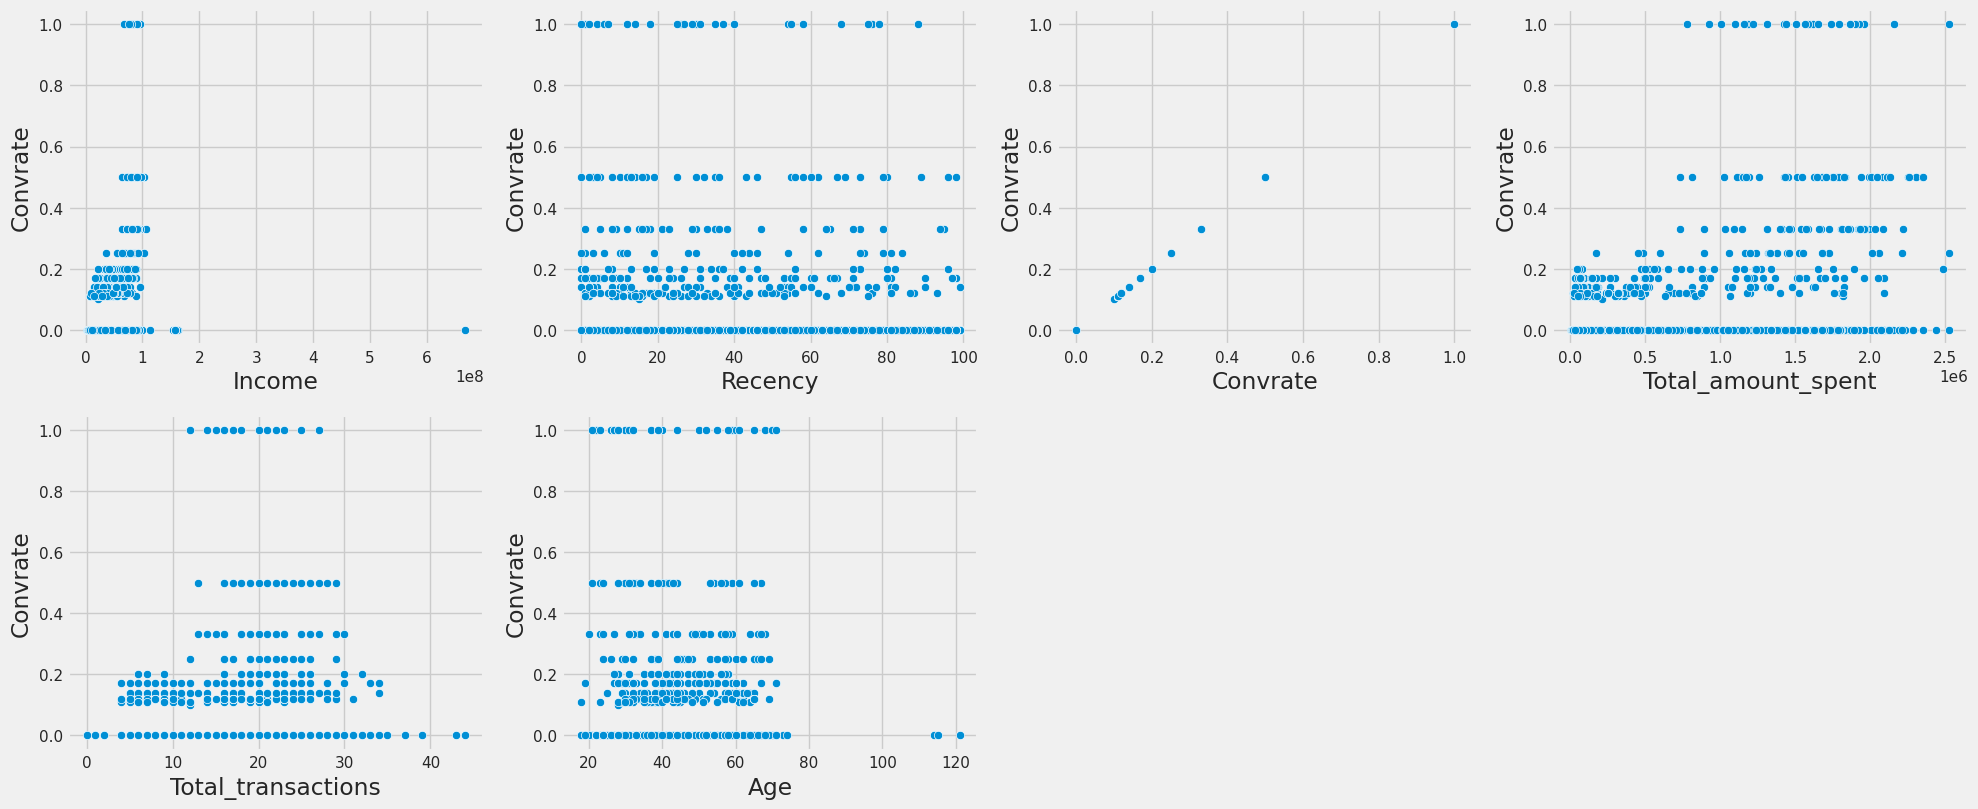

In [ ]:
#Individual Displot
plt.figure(figsize=(20, 20))
for i in range (0, len(analyze)):
  plt.subplot(5,4,i+1)
  sns.scatterplot(x=analyze[i], y='Convrate', data=df)
  plt.xlabel(analyze[i])
  plt.tight_layout()

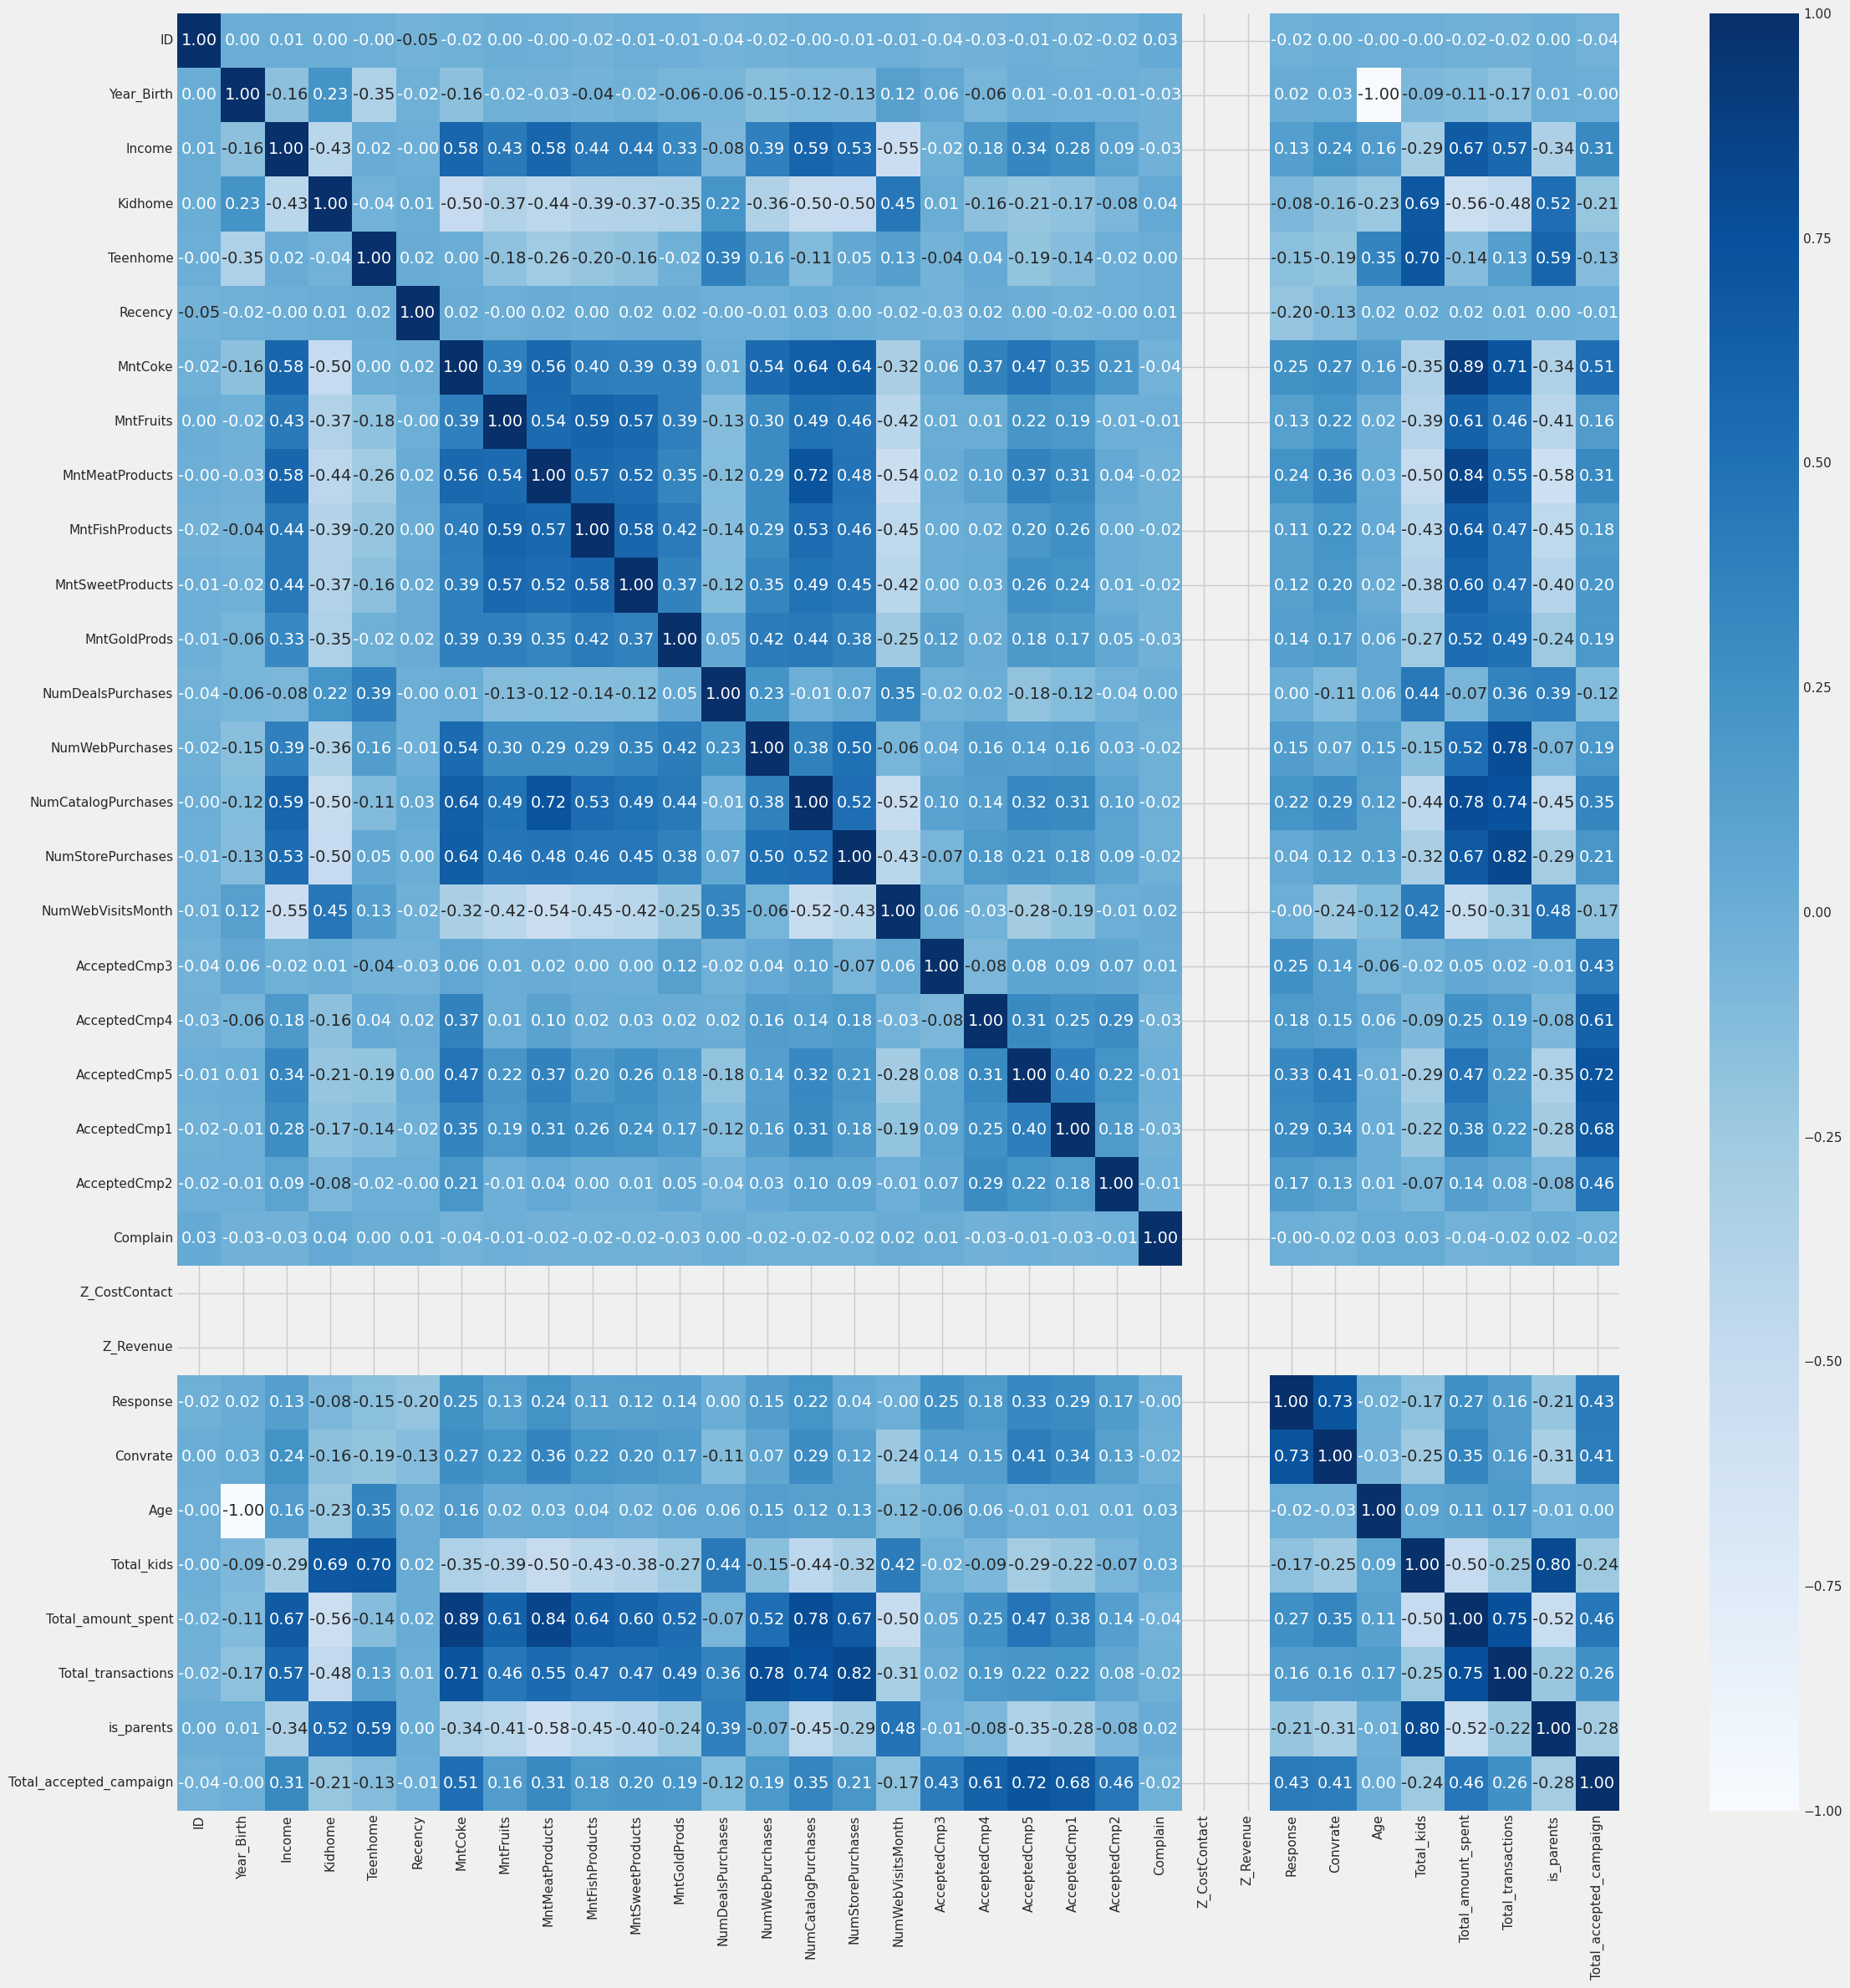

In [ ]:
# correlation heatmap
plt.figure(figsize=(24, 24))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.tight_layout()

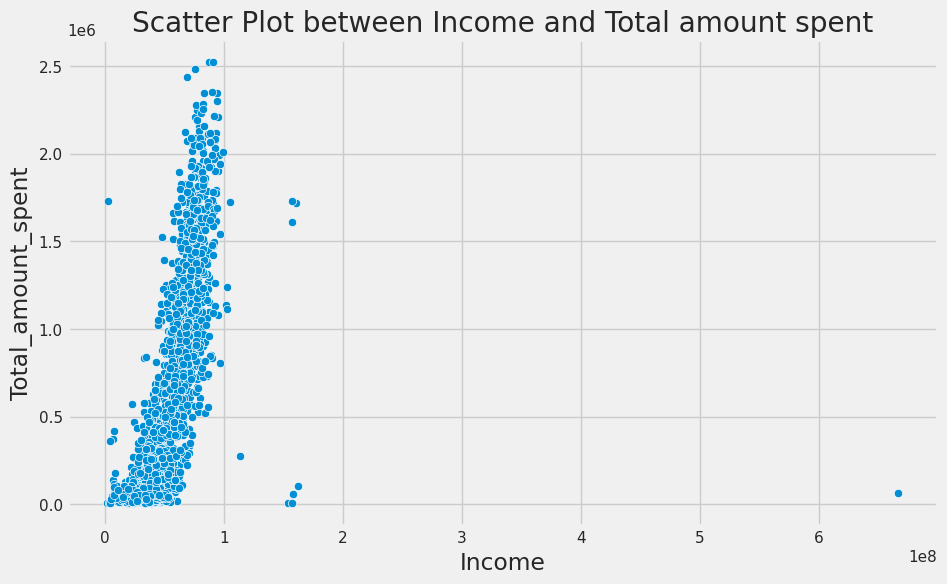

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Total_amount_spent', data=df)
plt.title('Scatter Plot between Income and Total amount spent')
plt.xlabel('Income')
plt.ylabel('Total_amount_spent')
plt.show()

### Summary
Dari hasil EDA, dapat terlihat bahwa bila outliers pada Income diabaikan, Conversion Rate berkorelasi positif terhadap Income dan Total Amount Spent. Serta Total Amount Spent linear dengan Income. Ini berarti semakin tinggi income yang didapatkan oleh customer, maka total spent nya pun meningkat disertai dengan tingkat conversion rate yang meningkat pula.

Tidak ada grafik lain yang menggambarkan bahwa conversion rate mempengaruhi/dipengaruhi oleh faktor lainnya.

Ini bisa dijadikan acuan untuk business recommendation, bahwasanya untuk meningkatkan conversion rate bisa difokuskan ke Income yang lebih besar.

## Task 2

Data Cleaning & Data Pre-Processing

In [ ]:
# Cek Duplikat
df.duplicated().sum()

0

In [ ]:
# Cek Data Null
df.isna().sum()

ID                          0
Year_Birth                  0
Education                   0
Marital_Status              0
Income                     24
Kidhome                     0
Teenhome                    0
Dt_Customer                 0
Recency                     0
MntCoke                     0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
Response                    0
Convrate                    0
Age                         0
Age_group                   0
Total_kids                  0
Total_amou

In [ ]:
# Drop Nilai NULL
df = df.dropna()
df.isna().sum()

ID                         0
Year_Birth                 0
Education                  0
Marital_Status             0
Income                     0
Kidhome                    0
Teenhome                   0
Dt_Customer                0
Recency                    0
MntCoke                    0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Convrate                   0
Age                        0
Age_group                  0
Total_kids                 0
Total_amount_spent         0
Total_transact

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2216 non-null   int64         
 1   Year_Birth               2216 non-null   int64         
 2   Education                2216 non-null   object        
 3   Marital_Status           2216 non-null   object        
 4   Income                   2216 non-null   float64       
 5   Kidhome                  2216 non-null   int64         
 6   Teenhome                 2216 non-null   int64         
 7   Dt_Customer              2216 non-null   datetime64[ns]
 8   Recency                  2216 non-null   int64         
 9   MntCoke                  2216 non-null   int64         
 10  MntFruits                2216 non-null   int64         
 11  MntMeatProducts          2216 non-null   int64         
 12  MntFishProducts          2216 non-

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Convrate,Age,Age_group,Total_kids,Total_amount_spent,Total_transactions,is_parents,Total_accepted_campaign
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0.14,57,Adult,0,1617000,25,0,0
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0.00,60,Adult,2,27000,6,1,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0.00,49,Adult,0,776000,21,0,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0.00,30,Young Adult,1,53000,8,1,0
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0.00,33,Young Adult,1,422000,19,1,0


### Drop Feature tidak terpakai

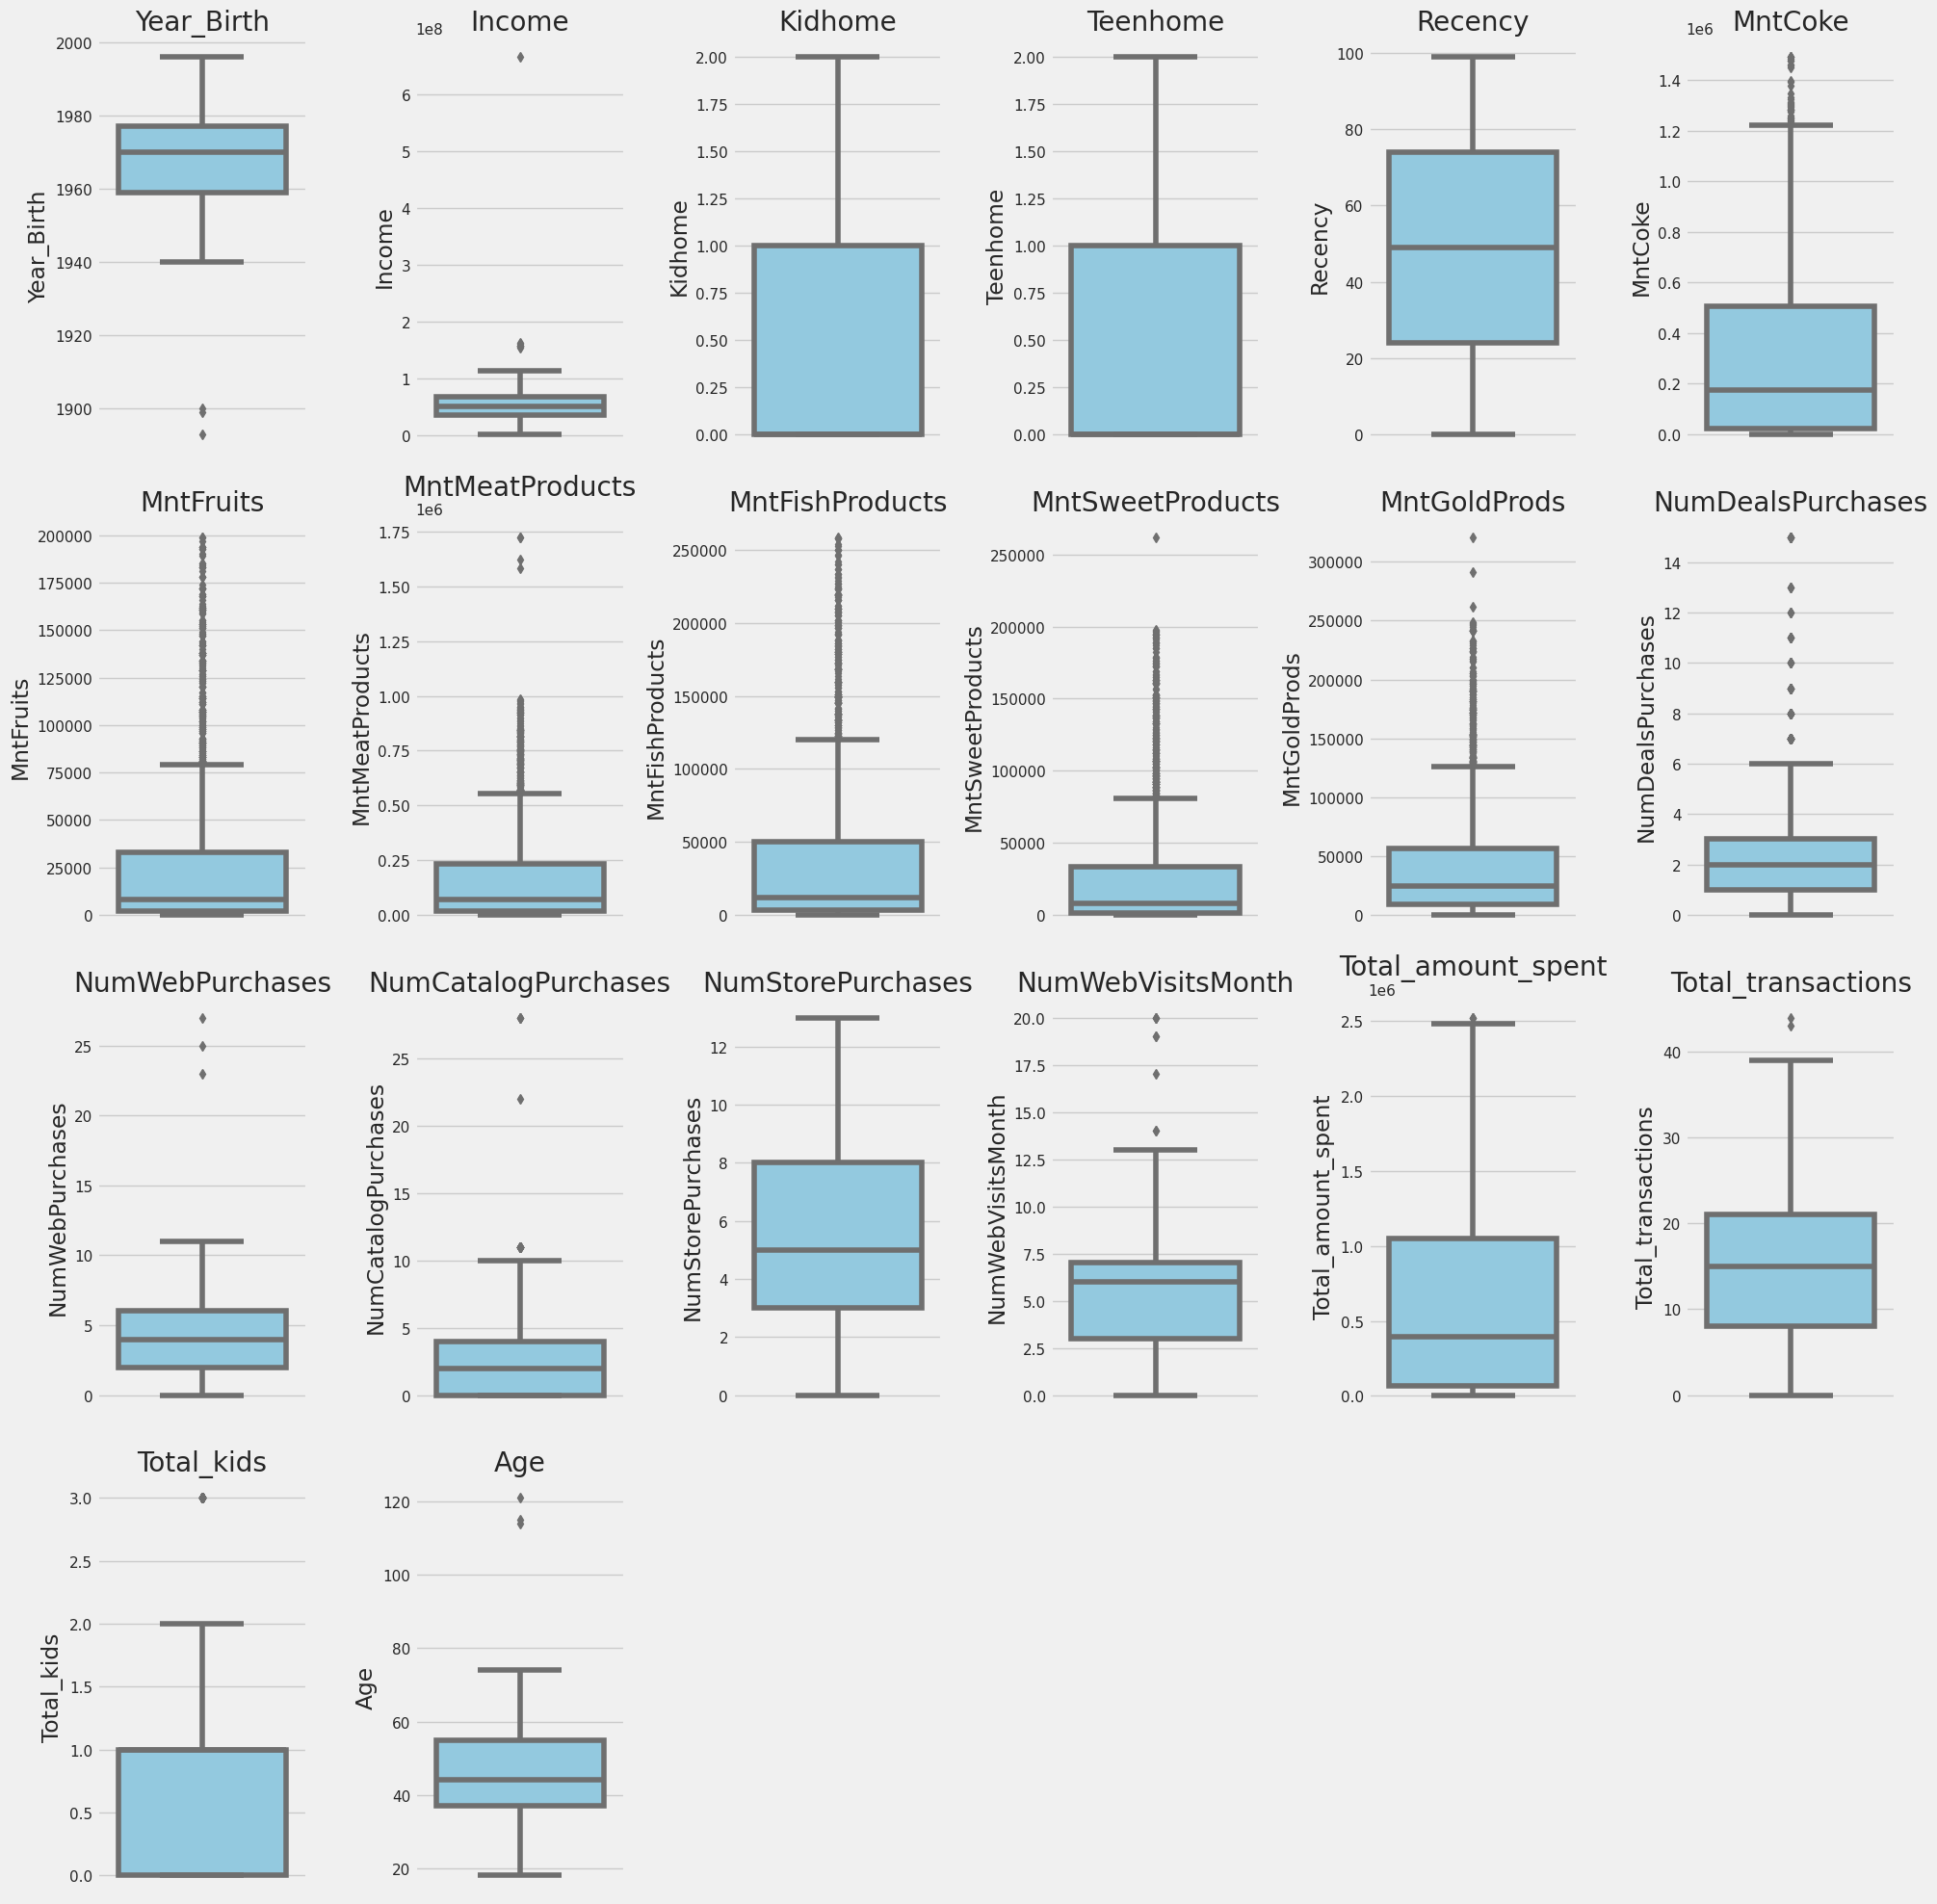

In [ ]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(nums):
    plt.subplot(4, 6, i + 1)
    sns.boxplot(y=df[column], color='skyblue', orient='v')
    plt.title(f'{column}')
    plt.tight_layout()

plt.show()

In [ ]:
df1 = df.copy()

In [ ]:
df1 = df1.drop(columns=['Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'])

### Remove Outliers

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([True] * len(df1))
for col in ['Income','Age', 'NumCatalogPurchases']:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df1[col] >= low_limit) & (df1[col] <= high_limit)) & filtered_entries

df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 2216
Jumlah baris setelah memfilter outlier: 2185


### Feature Encoding

In [ ]:
# Ubah value Marital Status menjadi 2 value(Married dan Never married)
not_married = ['Lajang', 'Bertunangan']
married = ['Menikah', 'Cerai', 'Janda', 'Duda']

Marital_Status = []
for i in df1['Marital_Status']:
    if i in not_married:
        status = 'Never married'
    else:
        status = 'Married'
    Marital_Status.append(status)

df1['Marital_Status'] = Marital_Status

In [ ]:
# label encoder for education
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df1['Education'] = df1['Education'].map(mapping_education)

In [ ]:
# Melakukan one-hot encoding pada kolom tertentu
df1 = pd.get_dummies(df1, columns=['Marital_Status', 'Age_group'])

# Membuat kolom 'is_parents' menjadi bentuk one-hot encoding
df1['is_parents'] = df1['is_parents'].apply(lambda x: 1 if x else 0)

In [ ]:
df1.head()

,ID,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Convrate,Age,Total_kids,Total_amount_spent,Total_transactions,is_parents,Total_accepted_campaign,Marital_Status_Married,Marital_Status_Never married,Age_group_Adult,Age_group_Senior Adult,Age_group_Young Adult
0,5524,2,58138000.0,0,0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,1,0.14,57,0,1617000,25,0,0,0,1,1,0,0
1,2174,2,46344000.0,1,1,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,0,0.00,60,2,27000,6,1,0,0,1,1,0,0
2,4141,2,71613000.0,0,0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,0,0.00,49,0,776000,21,0,0,0,1,1,0,0
3,6182,2,26646000.0,1,0,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,0,0.00,30,1,53000,8,1,0,0,1,0,0,1
4,5324,4,58293000.0,1,0,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,0,0.00,33,1,422000,19,1,0,1,0,0,0,1


### Standarisasi

In [ ]:
numerical = df1.select_dtypes(exclude='object')
numerical_cols = numerical.columns.to_list()

In [ ]:
from sklearn.preprocessing import StandardScaler
df_scaled = df1.copy()
ss = StandardScaler()

for col in numerical_cols:
    df_scaled[col] = ss.fit_transform(df_scaled[[col]])

display(df_scaled.shape, df_scaled.head(3))

(2185, 36)

,ID,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Convrate,Age,Total_kids,Total_amount_spent,Total_transactions,is_parents,Total_accepted_campaign,Marital_Status_Married,Marital_Status_Never married,Age_group_Adult,Age_group_Senior Adult,Age_group_Young Adult
0,-0.019088,-0.455688,0.326223,-0.828963,-0.935325,0.312312,0.985071,1.579014,1.808828,2.452298,1.493020,0.868787,0.364860,1.425920,2.813196,-0.560283,0.681186,-0.280142,-0.284865,-0.276324,-0.25864,-0.117988,-0.096114,2.396628,0.709716,1.022142,-1.276369,1.703065,1.349590,-1.601386,-0.438415,-1.05603,1.05603,0.558849,-0.224679,-0.484214
1,-1.050198,-0.455688,-0.246112,1.030672,0.900870,-0.378798,-0.869696,-0.636176,-0.732259,-0.648859,-0.632988,-0.735250,-0.170546,-1.130874,-0.590366,-1.176552,-0.150782,-0.280142,-0.284865,-0.276324,-0.25864,-0.117988,-0.096114,-0.417253,-0.302557,1.278853,1.396239,-0.957575,-1.162886,0.624459,-0.438415,-1.05603,1.05603,0.558849,-0.224679,-0.484214
2,-0.444767,-0.455688,0.980133,-0.828963,-0.935325,-0.793464,0.363843,0.585998,-0.162867,1.339530,-0.144250,-0.031039,-0.705951,1.425920,-0.212193,1.288524,-0.566767,-0.280142,-0.284865,-0.276324,-0.25864,-0.117988,-0.096114,-0.417253,-0.302557,0.337581,-1.276369,0.295771,0.820647,-1.601386,-0.438415,-1.05603,1.05603,0.558849,-0.224679,-0.484214


## Task 3

In [ ]:
df_model = df_scaled.copy()

In [ ]:
df_mod = df_model[['Recency', 'Total_transactions', 'Total_amount_spent']]

In [ ]:
mod_col = df_mod.columns

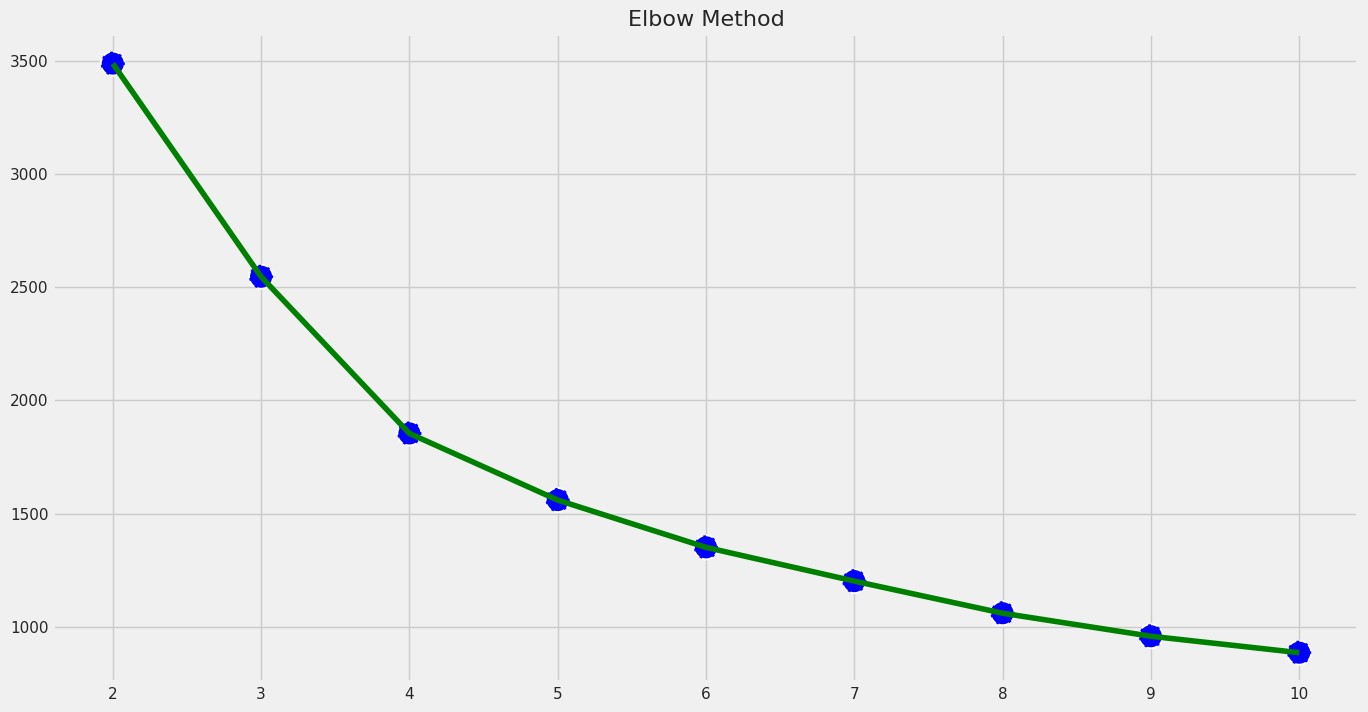

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_mod)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(15, 8))

sns.lineplot(x=range(2, 11), y=inertia, color='green', linewidth = 4)
sns.scatterplot(x=range(2,11), y=inertia, s=300, color='blue',  linestyle='--')

plt.title('Elbow Method', fontsize=16)
plt.show()

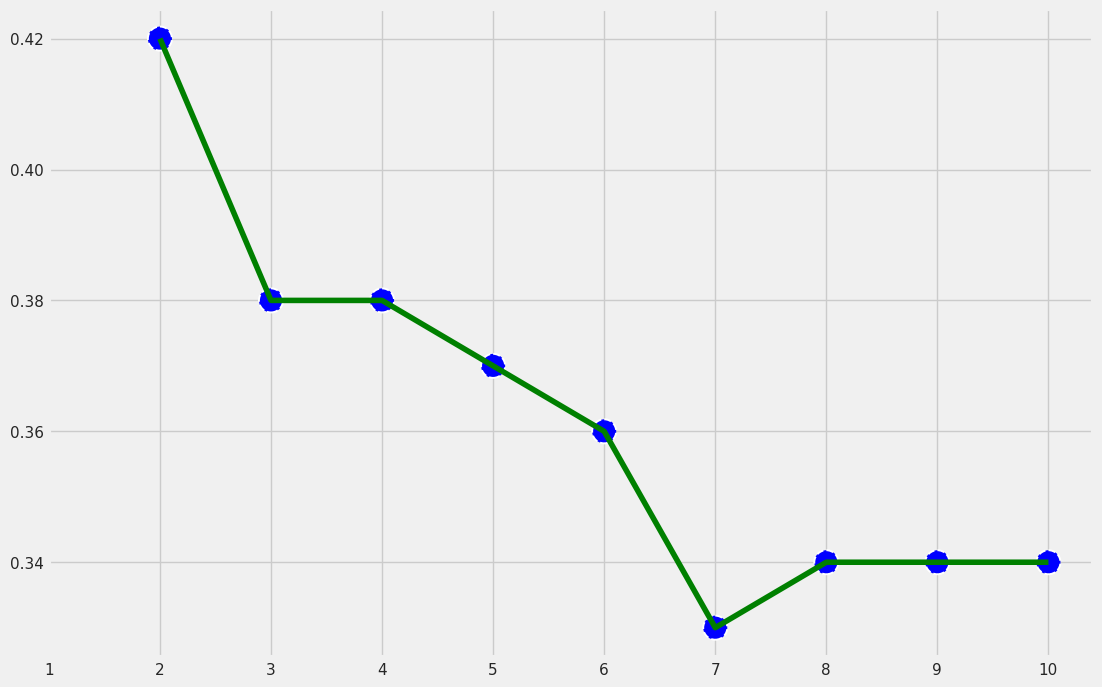

In [ ]:
arr_silhouette_score = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i).fit(df_mod)
    preds = kmeans.predict(df_mod)
    score_euclidean = silhouette_score(df_mod, preds, metric='euclidean')
    arr_silhouette_score.append(np.round(score_euclidean ,2))

x = range(2,11)

plt.figure(figsize=(12,8))
sns.lineplot(x=x, y=arr_silhouette_score, color='green', linewidth = 4)
sns.scatterplot(x=x, y=arr_silhouette_score, s=300, color='blue',  linestyle='--')


plt.xticks(range(1,11 ,1))
plt.show()

### Clustering

In [ ]:
model = KMeans(n_clusters=4, random_state=0).fit(df_mod)
df_mod['Cluster'] = model.labels_
df1['Cluster'] = model.labels_

In [ ]:
df_mod.groupby(['Cluster']).count()

,Recency,Total_transactions,Total_amount_spent
Cluster,,,
0,594,594,594
1,544,544,544
2,479,479,479
3,568,568,568


Dimensionality Reduction

In [ ]:
df_pca = df_mod.drop(columns = 'Cluster')

In [ ]:
df_pca

,Recency,Total_transactions,Total_amount_spent
0,0.312312,1.349590,1.703065
1,-0.378798,-1.162886,-0.957575
2,-0.793464,0.820647,0.295771
3,-0.793464,-0.898415,-0.914067
4,1.556310,0.556176,-0.296598
...,...,...,...
2235,-0.102354,0.423941,1.241218
2236,0.243201,0.952883,-0.259784
2237,1.452644,0.556176,1.073883
2238,-1.415463,1.085119,0.407886


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(df_pca)
pcs = pca.transform(df_pca)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

,PC 1,PC 2
0,2.166516,0.254346
1,-1.509421,-0.334847
2,0.766760,-0.819487
3,-1.303410,-0.757212
4,0.227113,1.543607


In [ ]:
df_pca['Cluster'] = model.labels_
df_pca

,PC 1,PC 2,Cluster
0,2.166516,0.254346,1
1,-1.509421,-0.334847,0
2,0.766760,-0.819487,2
3,-1.303410,-0.757212,0
4,0.227113,1.543607,1
...,...,...,...
2180,1.174196,-0.128846,2
2181,0.496599,0.219604,1
2182,1.193048,1.423736,1
2183,1.015446,-1.449904,2


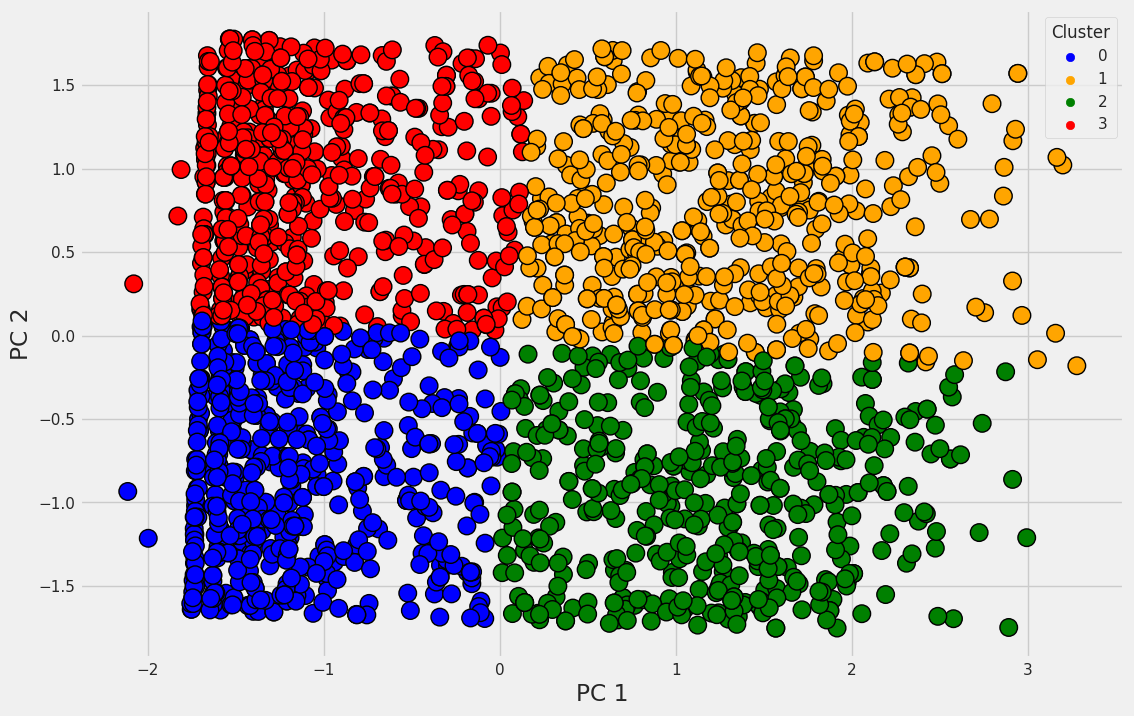

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="Cluster",
    edgecolor='black',
    #linestyle='--',
    data=df_pca,
    palette=['blue','orange','green','red'],
    s=160,
    ax=ax
);

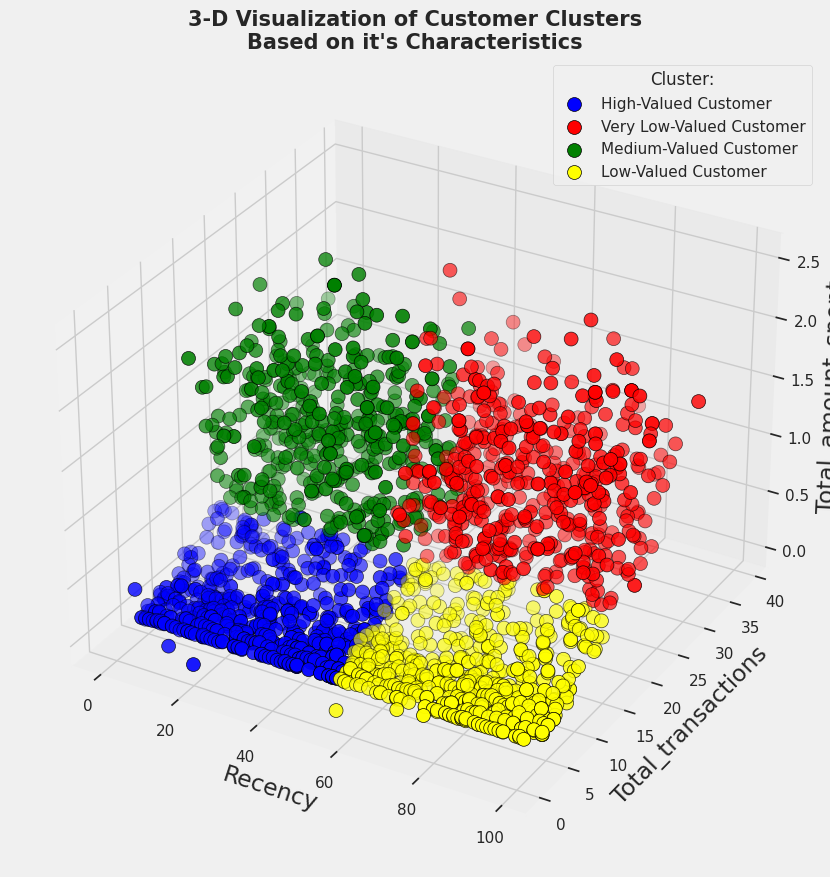

In [ ]:
df_2 = df1.copy()
df_2['Cluster'] = model.labels_

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters\nBased on it's Characteristics", fontsize=15, weight='bold')
ax.scatter(df_2['Recency'][df_2.Cluster == 0], df_2['Total_transactions'][df_2.Cluster == 0], df_2['Total_amount_spent'][df_2.Cluster == 0], c='blue', s=100, edgecolor='black', label='High-Valued Customer')
ax.scatter(df_2['Recency'][df_2.Cluster == 1], df_2['Total_transactions'][df_2.Cluster == 1], df_2['Total_amount_spent'][df_2.Cluster == 1], c='red', s=100, edgecolor='black', label='Very Low-Valued Customer')
ax.scatter(df_2['Recency'][df_2.Cluster == 2], df_2['Total_transactions'][df_2.Cluster == 2], df_2['Total_amount_spent'][df_2.Cluster == 2], c='green', s=100, edgecolor='black',  label='Medium-Valued Customer')
ax.scatter(df_2['Recency'][df_2.Cluster == 3], df_2['Total_transactions'][df_2.Cluster == 3], df_2['Total_amount_spent'][df_2.Cluster == 3], c='yellow', s=100, edgecolor='black', label='Low-Valued Customer')
plt.xlabel('Recency')
plt.ylabel('Total_transactions')
ax.set_zlabel('Total_amount_spent')
plt.legend(title='Cluster:')
plt.show()

In [ ]:
cluster = []

for i in df_2['Cluster']:
    if i == 0:
        grup = 'High Value Customer'
    elif i == 1:
        grup = 'Very Low Value Customer'
    elif i == 2:
        grup = 'Medium Value Customer'
    else :
        grup = 'Low Value Customer'
    cluster.append(grup)

df_2['Cluster'] = cluster

In [ ]:
mod_col = mod_col.insert(1, 'Cluster')
grouped_data = df_2[mod_col].groupby('Cluster')
result_df = grouped_data.agg(['mean', 'median', 'max', 'min'])

In [ ]:
display(result_df)

Recency                Total_transactions         \
                              mean median max min               mean median   
Cluster                                                                       
High Value Customer      24.518519   25.0  50   0           8.638047    8.0   
Low Value Customer       74.737676   76.0  99  50           9.012324    8.0   
Medium Value Customer    22.315240   23.0  48   0          21.624217   21.0   
Very Low Value Customer  72.202206   71.0  99  46          21.538603   21.0   

                                Total_amount_spent                              
                        max min               mean     median      max     min  
Cluster                                                                         
High Value Customer      18   0       1.272879e+05    69500.0   825000    6000  
Low Value Customer       19   0       1.362465e+05    79000.0   801000    5000  
Medium Value Customer    35  11       1.106069e+06  1053000.0  2525000  277000  
Very Low Value Customer  39  10       1.151748e+06  1101500.0  2486000  384000

In [ ]:
df_ac = df_2.groupby(['Cluster'])['Age'].count().reset_index()
df_ac.rename(columns = {'Age' : 'Total Customer'}, inplace=True)
df_ac['Percentage'] = np.round(df_ac['Total Customer'] / df_ac['Total Customer'].sum() * 100, 2)
df_ac

,Cluster,Total Customer,Percentage
0,High Value Customer,594,27.19
1,Low Value Customer,568,26.00
2,Medium Value Customer,479,21.92
3,Very Low Value Customer,544,24.90


In [ ]:
df_ac2 = df_2.groupby(['Cluster', 'Total_accepted_campaign'])['Age'].count().reset_index()
df_ac2.rename(columns = {'Age' : 'Total Customer'}, inplace=True)
df_ac2

,Cluster,Total_accepted_campaign,Total Customer
0,High Value Customer,0,539
1,High Value Customer,1,51
2,High Value Customer,2,4
3,Low Value Customer,0,520
4,Low Value Customer,1,48
5,Medium Value Customer,0,308
6,Medium Value Customer,1,107
7,Medium Value Customer,2,39
8,Medium Value Customer,3,19
9,Medium Value Customer,4,6


In [ ]:
high_valued   = df_2[df_2['Cluster'] == 'High Value Customer']['Total_amount_spent'].sum()
medium_valued = df_2[df_2['Cluster'] == 'Medium Value Customer']['Total_amount_spent'].sum()
low_valued    = df_2[df_2['Cluster'] == 'Low Value Customer']['Total_amount_spent'].sum()
very_low_valued = df_2[df_2['Cluster'] == 'Very Low Value Customer']['Total_amount_spent'].sum()
total = high_valued + medium_valued + low_valued + very_low_valued

print(f'Total Spent of High Value Customer : Rp. {high_valued}')
print(f'Total Spent of Medium Value Customer : Rp. {medium_valued}')
print(f'Total Spent of Low Value Customer : Rp. {low_valued}')
print(f'Total Spent of Very Low Value Customer : Rp. {very_low_valued}')
print(f'Total : Rp. {total}')

Total Spent of High Value Customer : Rp. 75609000
Total Spent of Medium Value Customer : Rp. 529807000
Total Spent of Low Value Customer : Rp. 77388000
Total Spent of Very Low Value Customer : Rp. 626551000
Total : Rp. 1309355000


### Interpretasi

- High Value Customer (Pelanggan Bernilai Tinggi): Kelompok ini memiliki rata-rata 'Recency' sekitar 24-25 hari, dengan jumlah transaksi rata-rata sekitar 8-9 dan total jumlah belanjaan rata-rata sekitar 127 juta hingga 136 juta. Kelompok ini memiliki 594 pelanggan, yang merupakan sekitar 27.19% dari total pelanggan.

- Low Value Customer (Pelanggan Bernilai Rendah): Kelompok ini memiliki 'Recency' yang relatif lebih tinggi, dengan rata-rata sekitar 74-76 hari, dengan jumlah transaksi rata-rata sekitar 9-10 dan total jumlah belanjaan rata-rata sekitar 136 juta. Kelompok ini terdiri dari 568 pelanggan, yang merupakan sekitar 26.00% dari total pelanggan.

- Medium Value Customer (Pelanggan Bernilai Sedang): Kelompok ini memiliki 'Recency' yang relatif rendah, dengan rata-rata sekitar 22-23 hari, dengan jumlah transaksi rata-rata sekitar 21-22 dan total jumlah belanjaan rata-rata sekitar 1,106 miliar. Kelompok ini memiliki 479 pelanggan, yang merupakan sekitar 21.92% dari total pelanggan.

- Very Low Value Customer (Pelanggan Bernilai Sangat Rendah): Kelompok ini memiliki 'Recency' yang tinggi, dengan rata-rata sekitar 72-73 hari, dengan jumlah transaksi rata-rata sekitar 21-22 dan total jumlah belanjaan rata-rata sekitar 1,151 miliar hingga 1,151 miliar. Kelompok ini terdiri dari 544 pelanggan, yang merupakan sekitar 24.90% dari total pelanggan.






